In [1]:
import sys
sys.path.insert(0, '/Users/danielfiuzadosil/Documents/GitHub_Repo/IPD_measuring_app')

In [2]:
from f_measurents import *
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
path_to_good_photos = '/Users/danielfiuzadosil/Documents/GitHub_Repo/IPD_measuring_app/photos/GOOD'
path_to_bad_photos = '/Users/danielfiuzadosil/Documents/GitHub_Repo/IPD_measuring_app/photos/BAD'

In [4]:
def absolute_paths_to_files(directory):
    paths = []
    for root, dirs, files in os.walk(os.path.abspath(directory)):
        for file in files:
            paths.append(str(os.path.join(root, file)))
    return paths

In [5]:
import config
import os
landmarks = config.landmarks
# top_to_bottom_angle_ref = config.top_to_bottom_angle_ref
# top_to_bottom_angle_max_deviation = config.top_to_bottom_angle_max_deviation
# left_to_right_angle_ref = config.left_to_right_angle_ref
# left_to_right_angle_max_deviation_perc = config.left_to_right_angle_max_deviation_perc
# area_ratio_right_to_left_max_deviation_perc = config.area_ratio_right_to_left_max_deviation_perc
# area_ratio_right_to_left_ref = config.area_ratio_right_to_left_ref

In [6]:
list_of_good_photos_filename = [f for f in listdir(path_to_good_photos) if isfile(join(path_to_good_photos, f))]
list_of_bad_photos_filename = [f for f in listdir(path_to_bad_photos) if isfile(join(path_to_bad_photos, f))]
list_of_photos_filename = list_of_good_photos_filename + list_of_bad_photos_filename
# 
list_of_good_photos_path = absolute_paths_to_files(path_to_good_photos)
list_of_bad_photos_path = absolute_paths_to_files(path_to_bad_photos)
list_of_photos_path = list_of_good_photos_path + list_of_bad_photos_path
# 
list_target_good = ["Good"] * len(list_of_good_photos_filename)
list_target_bad = ["Bad"] * len(list_of_bad_photos_filename)
list_target = list_target_good + list_target_bad
#
df = pd.DataFrame()
df["filename"] = list_of_photos_filename
df["filepath"] = list_of_photos_path
df["target"] = list_target
df

,filename,filepath,target
0,BD11034 Naoise Sweeney Front,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Good
1,BD11791 Thomas Oakley Front,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Good
2,BD11055 Cara Highfield Front,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Good
3,BD11022 Yi-Wen Doreen Hsu Front,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Good
4,BD12621 Ee Yu Front Refractives 02-03-2022 15-...,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Good
...,...,...,...
1254,BD12686 Poppy Daly Front Refractives,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Bad
1255,BD10374 Simon Betts Front.jpeg,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Bad
1256,BD12428 Derek Ngoo Front Refractives,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Bad
1257,10229 Princy Dinesh Front.jpeg,/Users/danielfiuzadosil/Documents/GitHub_Repo/...,Bad


FileNotFoundError: [Errno 2] No such file or directory: 'photos/output/processed_images/BD11034 Naoise Sweeney Front.pdf'

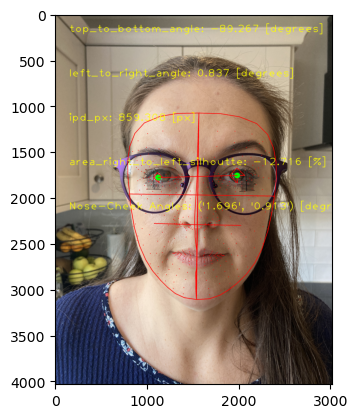

In [7]:
time_list = []
DISPLAY = True
SAVE = True
for i in range(len(df)):
    st = time.time()
    # Retrieve image
    df_temp = df.iloc[i]
    image = cv2.imread(df_temp['filepath'])
    if type(image) is not np.ndarray:
        print("Not a numpy array - skipping this photo!")
        continue
    # Process and mesaure image
    height, width = height_width_image(image)
    image_measured, ipd_px, width_face_px, height_face_px, top_to_bottom_angle, left_to_right_angle, left_cheek_to_nose_angle, nose_to_right_cheek_angle, area_px_left_silhoutte, area_px_right_silhoutte, area_right_to_left_silhoutte = measure_image(image, landmarks)
    if DISPLAY == True:
        plt.imshow(image_bgr_to_rgb(image_measured))
        if SAVE == True:
            filepath = 'photos/output/processed_images/' + df['filename'].iloc[i] + '.pdf'
            plt.savefig(filepath,transparent=True,bbox_inches='tight')
        plt.show()
    # 
    df.at[i,'ipd_px'] = ipd_px
    df.at[i,'width_face_px'] = width_face_px
    df.at[i,'height_face_px'] = height_face_px
    df.at[i,'top_to_bottom_angle'] = top_to_bottom_angle
    df.at[i,'left_to_right_angle'] = left_to_right_angle
    df.at[i,'left_cheek_to_nose_angle'] = left_cheek_to_nose_angle
    df.at[i,'nose_to_right_cheek_angle'] = nose_to_right_cheek_angle
    df.at[i,'area_px_left_silhoutte'] = area_px_left_silhoutte
    df.at[i,'area_px_right_silhoutte'] = area_px_right_silhoutte
    df.at[i,'area_right_to_left_silhoutte'] = area_right_to_left_silhoutte
    df.at[i,'img_height'] = height
    df.at[i,'img_width'] = width
    et = time.time()
    elapse_time = et - st
    print(i,'/', str(len(df)), ' : ', elapse_time)
    time_list.append(elapse_time)

In [ ]:
filepath = 'photos/output/photos_statistics_' + str(len(df)) + '.csv'
df.to_csv(filepath, index = False)

In [ ]:
df.columns